**Isaac Anthony Huamani Sulca - 20215421**

>LO MOSTRADO EN ESTA SECCION ES PURAMENTE CODIGO 
>
>LA EXPLICACION DEL POR QUÉ ESTA EN EL REPORTE (.pdf)

# 1. Diseño de filtros digitales

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import firwin, freqz

Parte 1) 


In [186]:
#parametros 
As = 80 # Atenuación en la banda de rechazo 
fs_inicial = 100e6 # Frecuencia de muestreo inicial 
fs_decimacion = 1e6 # Frecuencia de muestreo después de la decimación 
f_corte = 1e6  # Frecuencia de corte 
delta_f = 0.1 * fs_decimacion # Ancho de banda de transición (10% de la frecuencia de muestreo)

In [187]:
# Determinamos la longitud y el beta para el filtro
M = int(np.ceil((As - 8) / (2.285 * (delta_f / fs_decimacion))))*16
beta = signal.kaiser_beta(As)  # Beta para la ventana de Kaiser

# Generamos el filtro mediante enventanamiento de Kaiser con firwin
h_kaiser = firwin(M, f_corte, window=('kaiser', beta), fs=fs_inicial)

In [188]:
# respuesta en frecuencia y el arreglo de frecuencias correspondiente de 0- 2 MHz
freq = np.linspace(0, 2e6, num=1024)
w, H_Kaiser = freqz(h_kaiser, worN=freq, fs=fs_inicial)

# También obtenemos la respuesta en dB y la fase del filtro.
H_K_dB = 20 * np.log10(abs(H_Kaiser))
H_K_phase = np.unwrap(np.angle(H_Kaiser))

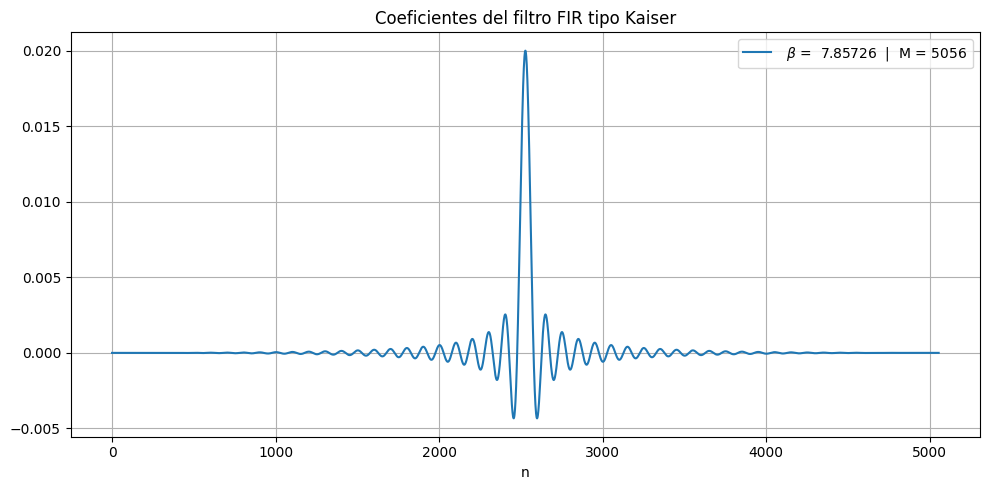

In [189]:
#Grafica de los coeficientes del filtro
plt.figure(figsize=(10, 5))
plt.plot(h_kaiser, label=' $β$ =  7.85726  |  M = 5056')
plt.title("Coeficientes del filtro FIR tipo Kaiser")
plt.xlabel("n")
plt.grid('on')
plt.legend()
plt.tight_layout()
plt.show()

In [190]:
# grafica en magnitud
plt.figure(figsize=(10, 5))
plt.plot(freq/1e6, H_K_dB, 'b', linewidth=1.5)
plt.axhline(y=-80, color='green', linestyle='-', label='Atenuación en la Banda de Rechazo')
plt.title('Respuesta en Magnitud del Filtro')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True, alpha=0.3)
plt.xlim([0, 2])


(0.0, 2.0)

(0.0, 2.0)

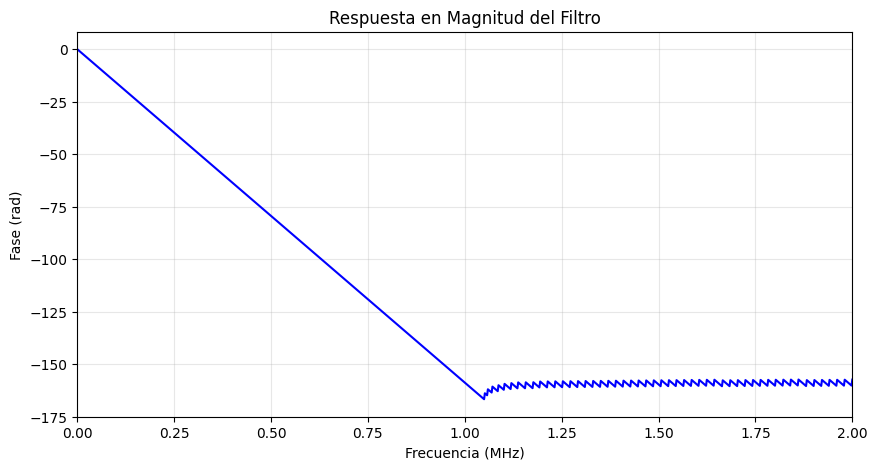

In [191]:
# Grafica de fase
plt.figure(figsize=(10, 5))
plt.plot(freq/1e6, H_K_phase, 'b', linewidth=1.5)
plt.title('Respuesta en Magnitud del Filtro')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Fase (rad)')
plt.grid(True, alpha=0.3)
plt.xlim([0, 2])


In [192]:
# Ahora buscamos lo parametros de nuestro interes
# Banda de Transición
passband_edge = w[(H_K_dB > 0) & (H_K_dB < 0.7e-4)][-1]
stopband_edge = np.min(w[(w > 1.0475e6) & (w < 1.1e6)])
transition_band = np.abs(stopband_edge - passband_edge)

# Rizado en la Banda de Paso 
passband_max_ripple = np.max(H_K_dB[(w >= 0) & (w <= f_corte-0.25e6)])
passband_min_ripple = np.min(H_K_dB[(w >= 0) & (w <= f_corte-0.25e6)])
ripple_passband = np.abs(passband_min_ripple-passband_max_ripple)

# Rizado en la Banda de Rechazo
stopband_max_ripple = np.max(H_K_dB[w >= 1.0525e6])
stopband_min_ripple = np.min(H_K_dB[w >= 1.0525e6])
ripple_stopband = np.abs(stopband_min_ripple-stopband_max_ripple)


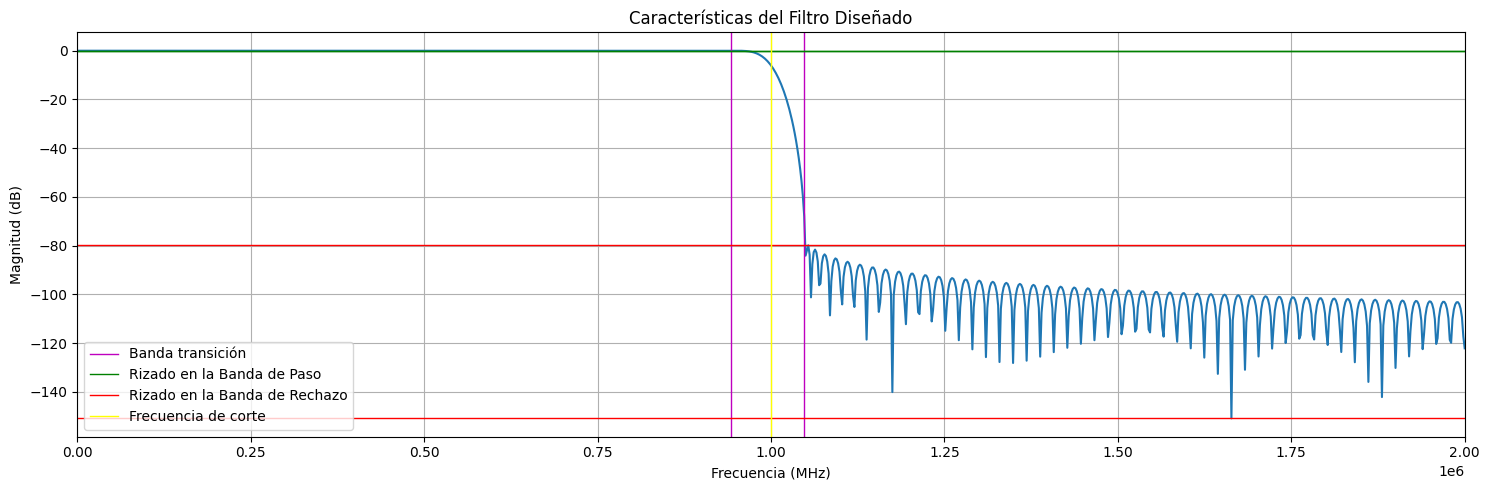

In [193]:

plt.figure(figsize=(15, 5))
plt.plot(w, H_K_dB)
plt.title('Características del Filtro Diseñado')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Magnitud (dB)')
plt.xlim([0,2e6])

plt.axvline(x=passband_edge, color='m', linewidth=1, label='Banda transición')
plt.axvline(x=stopband_edge, color='m', linewidth=1)

plt.axhline(y=passband_max_ripple, color='green', linewidth=1, label='Rizado en la Banda de Paso')
plt.axhline(y=passband_min_ripple, color='green', linewidth=1,)

plt.axhline(y=stopband_max_ripple, color='red', linewidth=1, label='Rizado en la Banda de Rechazo')
plt.axhline(y=stopband_min_ripple, color='red', linewidth=1)

plt.axvline(x=f_corte, color='yellow', linewidth=1, label='Frecuencia de corte')

plt.grid('on')
plt.legend()
plt.tight_layout()
plt.show()

In [194]:
print('Banda de Transición')
print(f"Ancho de la Banda de Transición: {transition_band}")
print(f"Frecuencia Inicial de Transición: {passband_edge}")
print(f"Frecuencia de Corte: {f_corte}")
print(f"Frecuencia Final de Transición: {stopband_edge}")
print('Banda de Paso')
print(f"Rizado Banda de Paso: {ripple_passband}")
print('Banda de Rechazo ')
print(f"Rizado Banda de Rechazo: {ripple_stopband}")

Banda de Transición
Ancho de la Banda de Transición: 105571.84750733152
Frecuencia Inicial de Transición: 942326.4907135875
Frecuencia de Corte: 1000000.0
Frecuencia Final de Transición: 1047898.338220919
Banda de Paso
Rizado Banda de Paso: 0.000292183498588291
Banda de Rechazo 
Rizado Banda de Rechazo: 71.00841734997553


Parte 2) 

In [195]:
# parametros anteriores
As = 80 # Atenuación banda de rechazo en dB
fs_inicial = 100e6 # Frecuencia de muestreo inicial 
fs_decimacion = 1e6 # Frecuencia de muestreo después de la decimación 
f_corte = 1e6  # Frecuencia de corte 
delta_f = 0.1 * fs_decimacion # Ancho de banda de transición (10% de la frecuencia de muestreo)

beta = signal.kaiser_beta(As)  # Beta para la ventana de Kaiser
M = int(np.ceil((As - 8) / (2.285 * (delta_f / fs_inicial))))

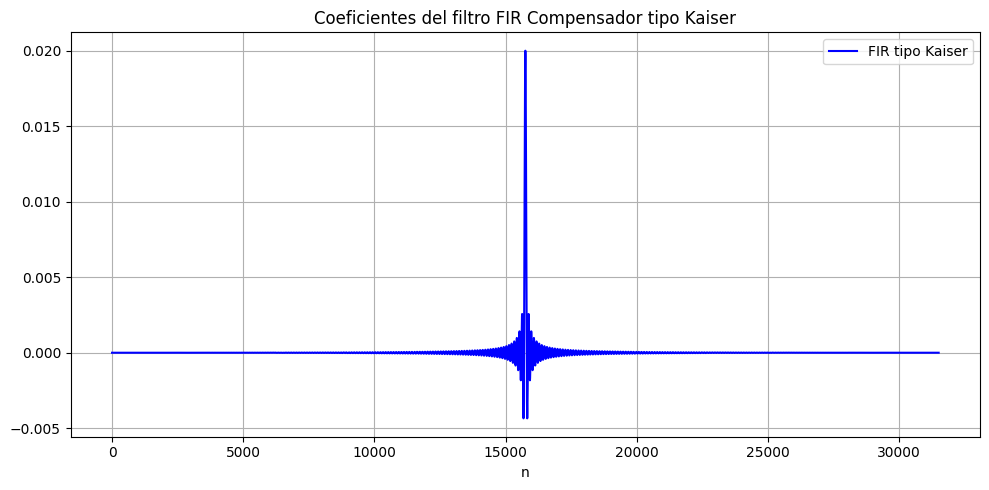

In [196]:
# funciones del filtro CIC en magnitud
# Filtros CIC

w = np.linspace(0.01, np.pi, num=8000)

HCIC2= (np.sin(w) / np.sin(w / 2)) ** 2
HCIC5= (np.sin(5 * w / 2) / np.sin(w / 2)) ** 5

HCasc= HCIC2*HCIC5

#FIR compensador usando Kaiser de la parte 1
h2 = signal.firwin(M, f_corte / (fs_inicial / 2), window=('kaiser', beta), pass_zero='lowpass')

w2, H_FIR = signal.freqz(h2, worN=8000)
f2 = w2 * fs_inicial / (2 * np.pi)

#Respuesta del sistema
HCIC_FIR= HCasc*H_FIR
HCIC_FIR = HCIC_FIR / np.max(np.abs(HCIC_FIR))

#Obtenemos magnitud (dB) y fase (rad) respectiva
HCIC_FIR_dB = 20 * np.log10(abs(HCIC_FIR))
HCIC_FIR_fase = np.unwrap(np.angle(HCIC_FIR))

#grafica de los coeficientes del filtro compensador
plt.figure(figsize=(10, 5))

plt.plot(h2, 'b', label='FIR tipo Kaiser')
plt.title("Coeficientes del filtro FIR Compensador tipo Kaiser")
plt.xlabel("n")
plt.grid('on')
plt.legend()
plt.tight_layout()
plt.show()

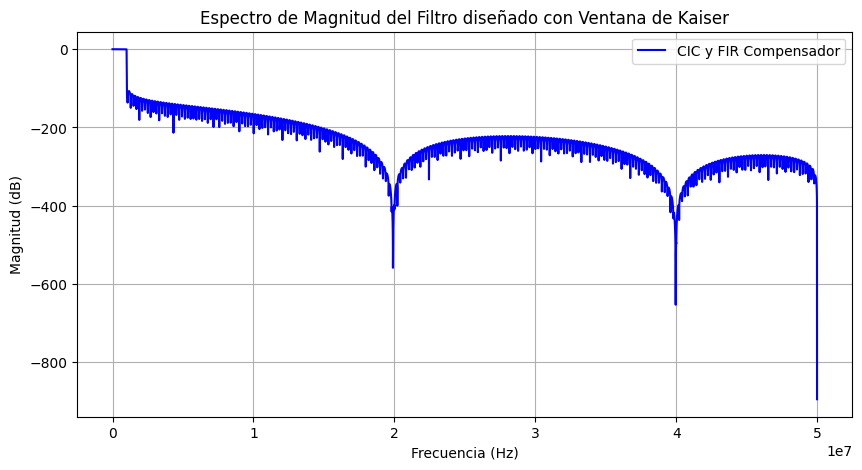

In [197]:
#Grafica de la magnitud
plt.figure(figsize=(10, 5))
plt.plot(f2, HCIC_FIR_dB, 'b', label='CIC y FIR Compensador')
plt.title("Espectro de Magnitud del Filtro diseñado con Ventana de Kaiser")
plt.ylabel("Magnitud (dB)")
plt.xlabel("Frecuencia (Hz)")
plt.legend()
plt.grid('on')

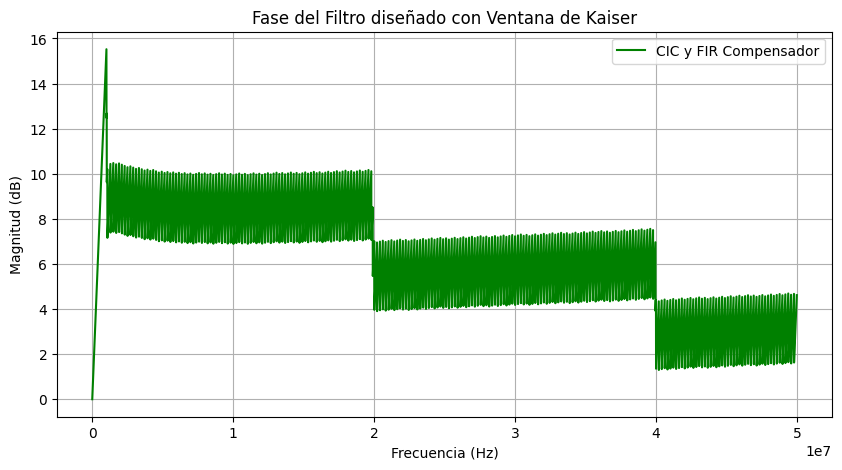

In [198]:
#Grafica de la fase
plt.figure(figsize=(10, 5))
plt.plot(f2, HCIC_FIR_fase, 'g', label='CIC y FIR Compensador')
plt.title("Fase del Filtro diseñado con Ventana de Kaiser")
plt.ylabel("Magnitud (dB)")
plt.xlabel("Frecuencia (Hz)")
plt.legend()
plt.grid('on')

In [199]:
#filtro FIR usando enventanado con ventana de Kaiser
h1 = signal.firwin(M, f_corte / (fs_inicial / 2), window=('kaiser', beta), pass_zero='lowpass')

w1, H1 = signal.freqz(h1, worN=8000)
f1 = w1 * fs_inicial/ (2 * np.pi)
H1 = H1 / np.max(np.abs(H1))

#Parametros que nos interesan
#Banda de Transición 
passband_edge = 0.99e6
stopband_edge = 1.025e6
transition_band = np.abs(stopband_edge - passband_edge)

#Rizado en la Banda de Paso
passband_max_ripple = np.max(HCIC_FIR_dB[(f2 >= 0) & (f2 <= f_corte-0.25e6)])
passband_min_ripple = np.min(HCIC_FIR_dB[(f2 >= 0) & (f2 <= f_corte-0.25e6)])
ripple_passband = np.abs(passband_min_ripple-passband_max_ripple)

#Rizado en la Banda de Rechazo
stopband_max_ripple = np.max(HCIC_FIR_dB[f2 >= 1.0525e6])
stopband_min_ripple = np.min(HCIC_FIR_dB[f2 >= 1.0525e6])
ripple_stopband = np.abs(stopband_min_ripple-stopband_max_ripple)

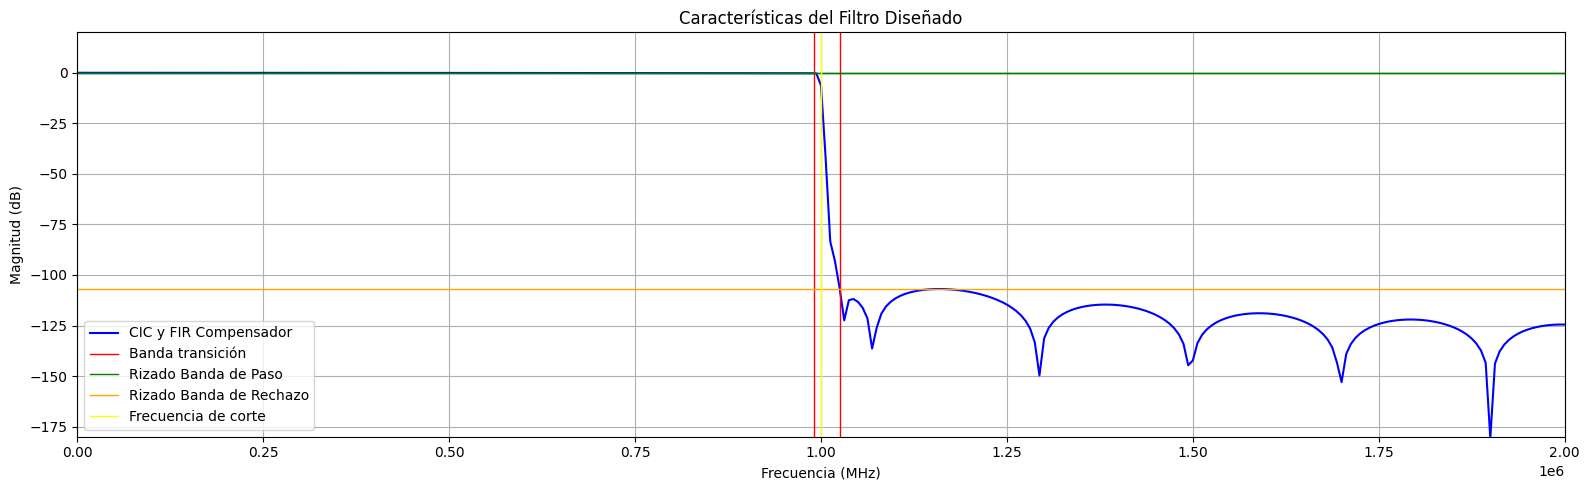

In [200]:
# Gráfica de los parámetros 

plt.figure(figsize=(16, 5))
plt.plot(f2, HCIC_FIR_dB, 'b', label='CIC y FIR Compensador')
plt.title('Características del Filtro Diseñado')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Magnitud (dB)')
plt.xlim(0, 2e6) 
plt.ylim(-180, 20) 

plt.axvline(x=passband_edge, color='r', linewidth=1, label='Banda transición')
plt.axvline(x=stopband_edge, color='r', linewidth=1)

plt.axhline(y=passband_max_ripple, color='g', linewidth=1, label='Rizado Banda de Paso')
plt.axhline(y=passband_min_ripple, color='g', linewidth=1,)

plt.axhline(y=stopband_max_ripple, color='orange', linewidth=1, label='Rizado Banda de Rechazo')
plt.axhline(y=stopband_min_ripple, color='orange', linewidth=1)

plt.axvline(x=f_corte, color='yellow', linewidth=1, label='Frecuencia de corte')
plt.grid('on')
plt.legend()
plt.tight_layout()
plt.show()

In [201]:
print('Banda de Transición')
print(f"Ancho de la Banda de Transición: {transition_band}")
print(f"Frecuencia Inicial de Transición: {passband_edge}")
print(f"Frecuencia de Corte del Filtro: {f_corte}")
print(f"Frecuencia Final de Transición: {stopband_edge}")
print('Banda de Paso')
print(f"Rizado Banda de Paso: {ripple_passband}")
print('Banda de Rechazo')
print(f"Rizado Banda de Rechazo: {ripple_stopband}")

Banda de Transición
Ancho de la Banda de Transición: 35000.0
Frecuencia Inicial de Transición: 990000.0
Frecuencia de Corte del Filtro: 1000000.0
Frecuencia Final de Transición: 1025000.0
Banda de Paso
Rizado Banda de Paso: 0.14358553910260385
Banda de Rechazo
Rizado Banda de Rechazo: 787.3658967059018


Parte 3) 

In [202]:
# Se volvió a generar el filtro de la primera parte Kaiser
As = 80 #Atenuación en la banda de rechazo en dB
fs_inicial = 100e6 #Frecuencia de muestreo inicial 
fs_decimacion = 1e6 #Frecuencia de muestreo después de la decimación 
f_corte = 1e6  #Frecuencia de corte 
delta_f = 0.1 * fs_decimacion #Ancho de banda de transición 

beta = signal.kaiser_beta(As)  # Beta para la ventana de Kaiser
M = int(np.ceil((As - 8) / (2.285 * (delta_f / fs_inicial))))

# Filtro FIR con ventana de Kaiser de la primera parte
h_k1 = signal.firwin(M, f_corte / (fs_inicial / 2), window=('kaiser', beta), pass_zero='lowpass')

# Respuesta en frecuencia del filtro FIR tipo Kaiser
w1, H_k1 = signal.freqz(h_k1, worN=8000)
freq3 = w1 * fs_inicial / (2 * np.pi)

Hk1_dB = 20 * np.log10(abs(H_k1))
Hk1_phase = np.unwrap(np.angle(H_k1))

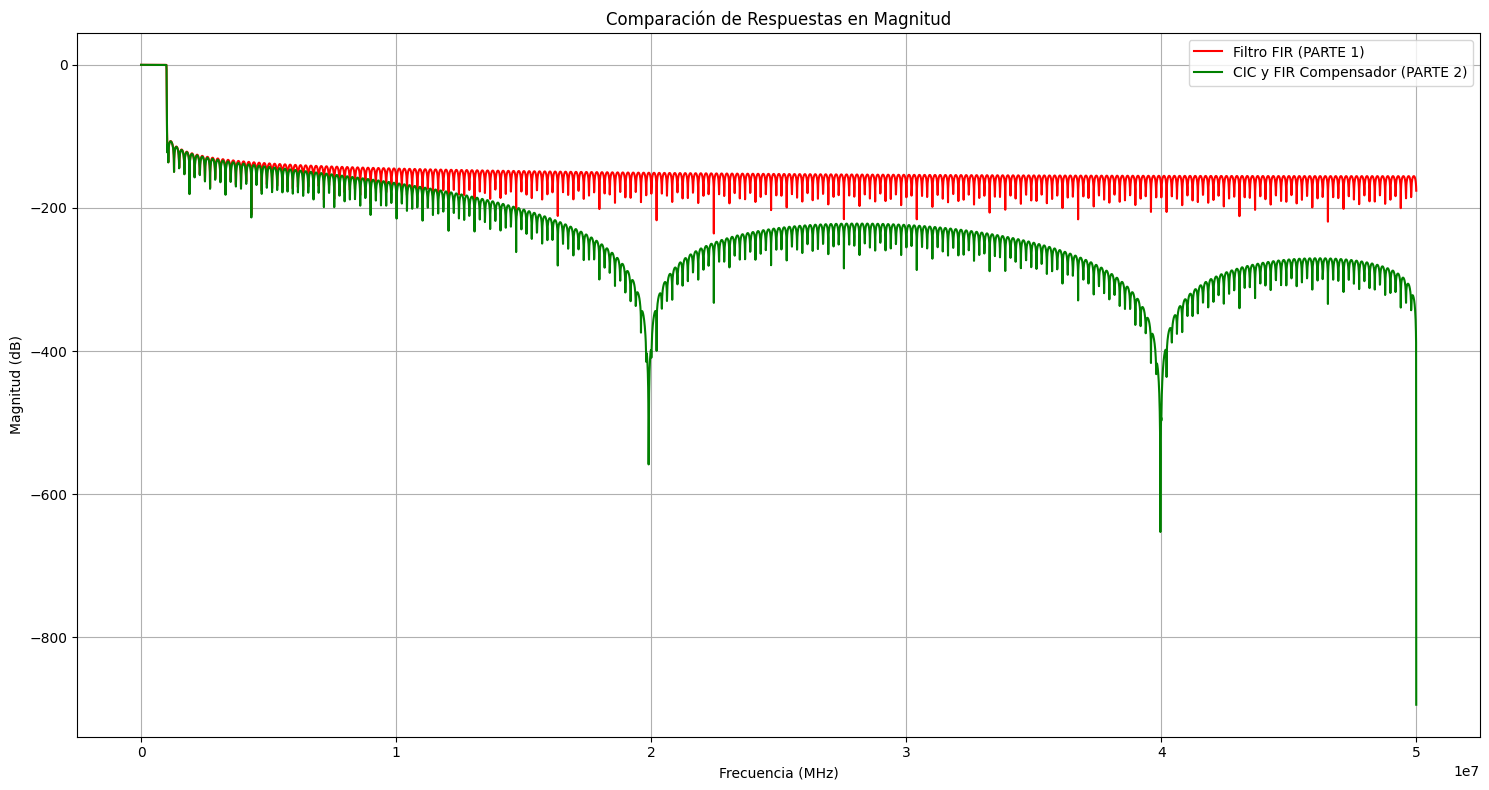

In [203]:
# Gráficos de comparación
plt.figure(figsize=(15, 8))

# Respuesta en magnitud
plt.plot(freq3, Hk1_dB,'red', label='Filtro FIR (PARTE 1)')
plt.plot(f2, HCIC_FIR_dB, 'green', label='CIC y FIR Compensador (PARTE 2)')
plt.title('Comparación de Respuestas en Magnitud')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Magnitud (dB)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

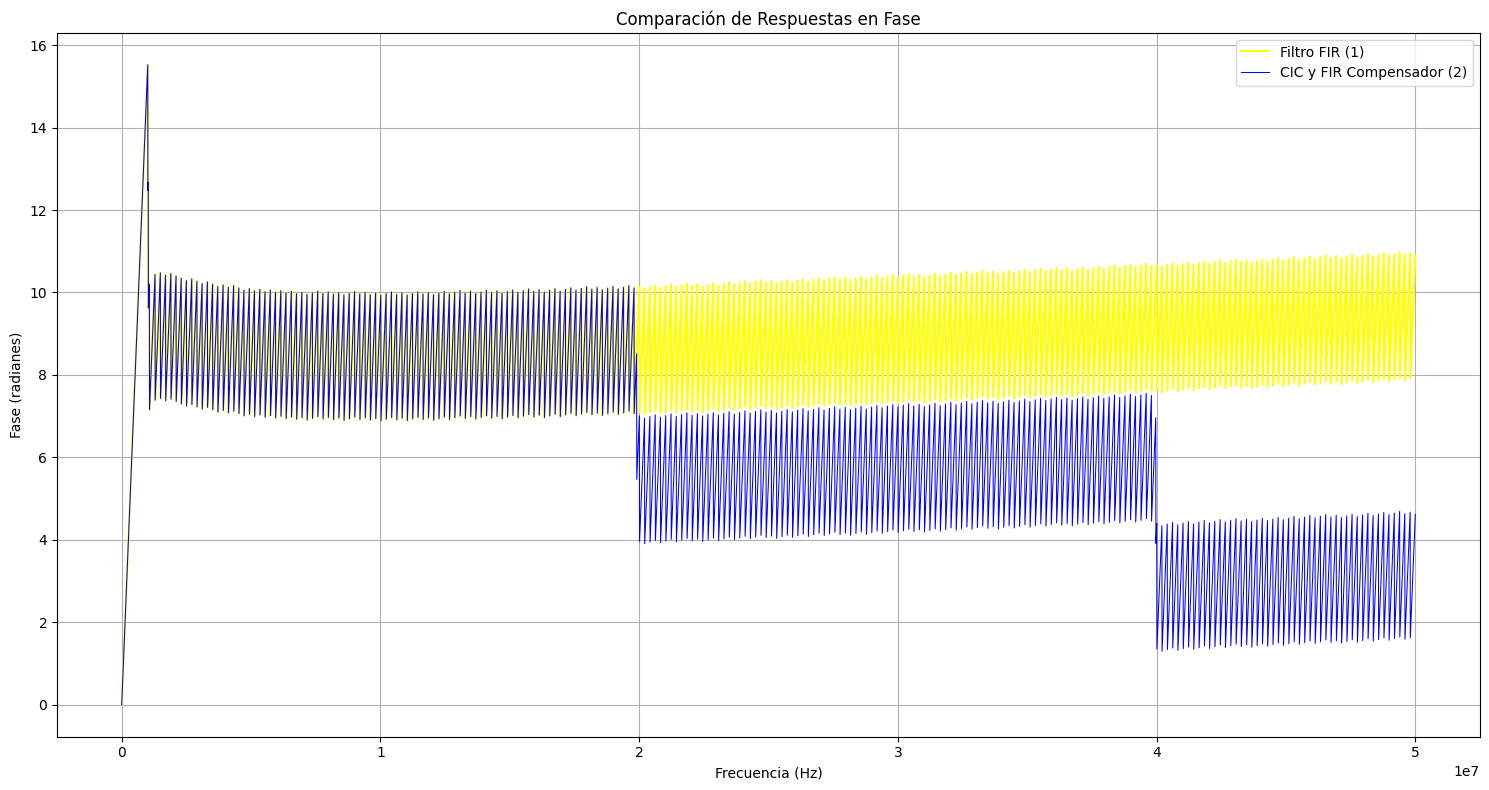

In [204]:
plt.figure(figsize=(15, 8))

# Fase
plt.plot(freq3, Hk1_phase,'yellow', label='Filtro FIR (1)')
plt.plot(f2, HCIC_FIR_fase, 'blue', linewidth=0.75, label='CIC y FIR Compensador (2)')
plt.title('Comparación de Respuestas en Fase')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# 2. Cancelador de ruido

Parte 1)

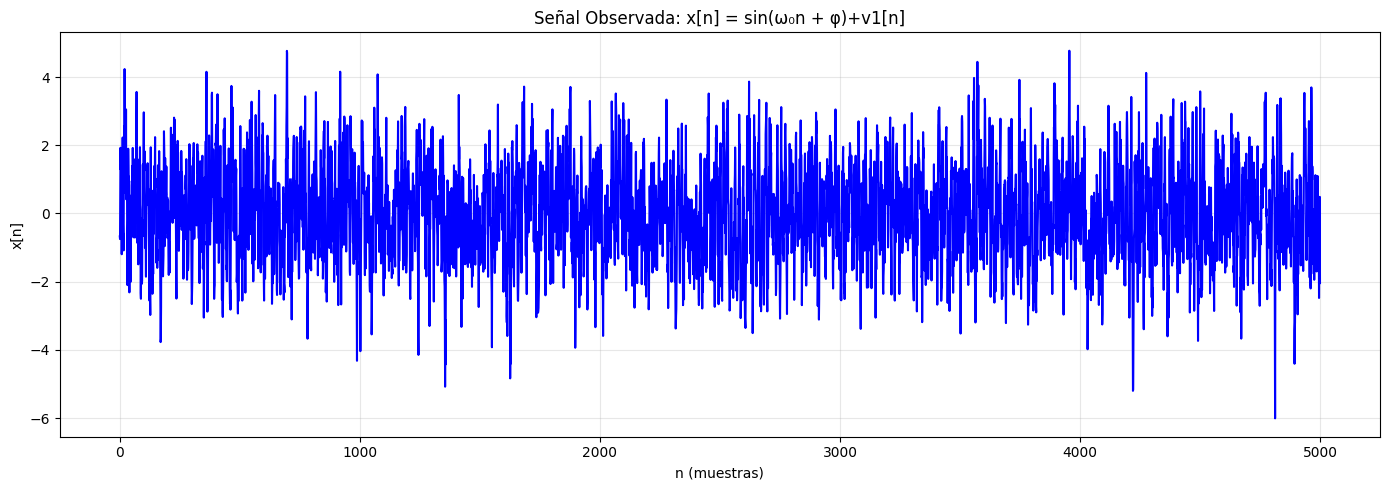

In [205]:
N=5000
w0 = np.pi/8
phi = 0

n= np.arange(N)
d_n= np.sin(w0*n+phi)
g_n= np.random.randn(N)

#parametros filtro AR
a1= 0.6
a2= -0.4
v1= signal.lfilter([1],[1,-a1],g_n)
v2= signal.lfilter([1],[1,-a2],g_n)

x_n= d_n + v1

# Visualizar señal observada
plt.figure(figsize=(14, 5))
plt.plot(x_n, 'b-', linewidth=1.5)
plt.xlabel('n (muestras)')
plt.ylabel('x[n]')
plt.title('Señal Observada: x[n] = sin(ω₀n + φ)+v1[n]')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



ANÁLISIS PARA M = 2


<>:57: SyntaxWarning: invalid escape sequence '\h'
<>:58: SyntaxWarning: invalid escape sequence '\h'
<>:57: SyntaxWarning: invalid escape sequence '\h'
<>:58: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-3398276239.py:57: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(d_estimado, label='Señal estimada $\hat{d}[n]$')
/tmp/ipython-input-3398276239.py:58: SyntaxWarning: invalid escape sequence '\h'
  plt.title(f'Señal deseada $d[n]$ y estimada $\hat{{d}}[n]$ (M={M})')


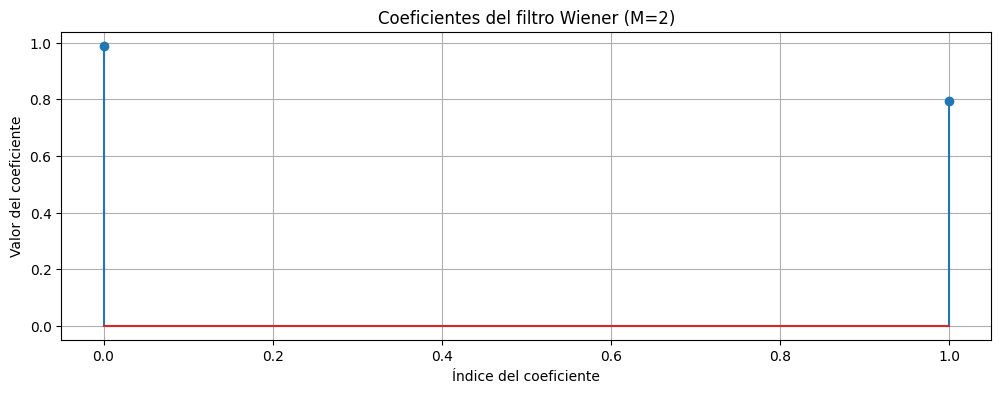

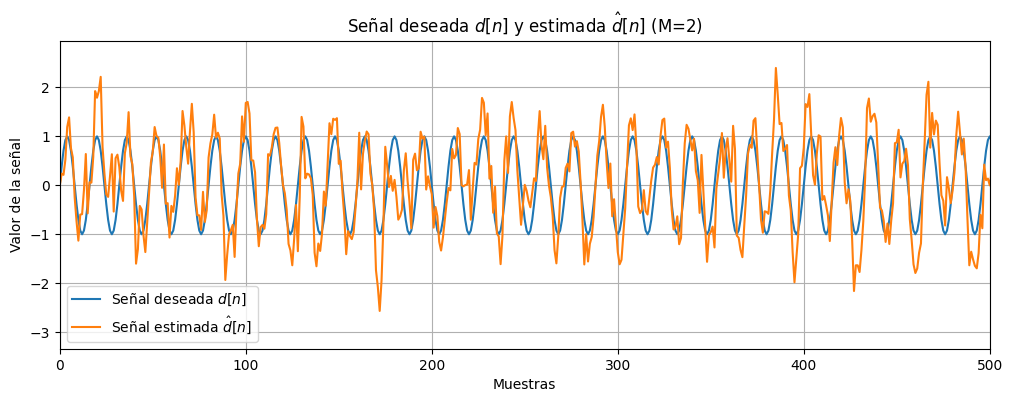

Error cuadrático medio para M=2: 0.3560270039170172

ANÁLISIS PARA M = 4


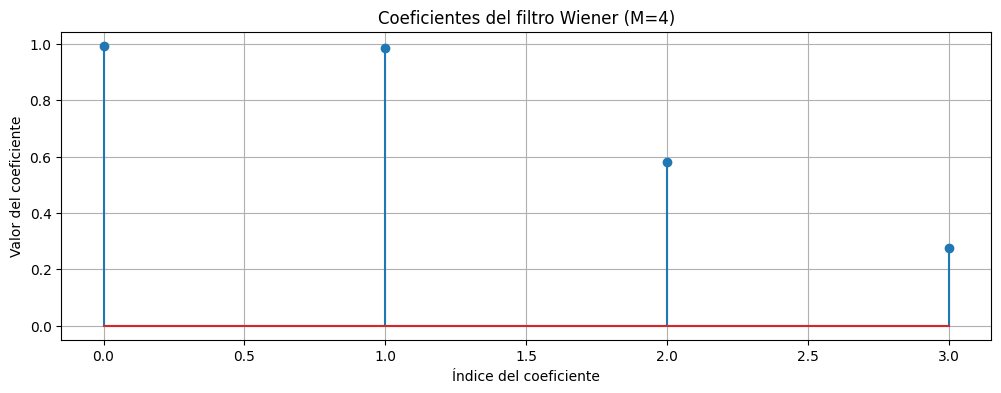

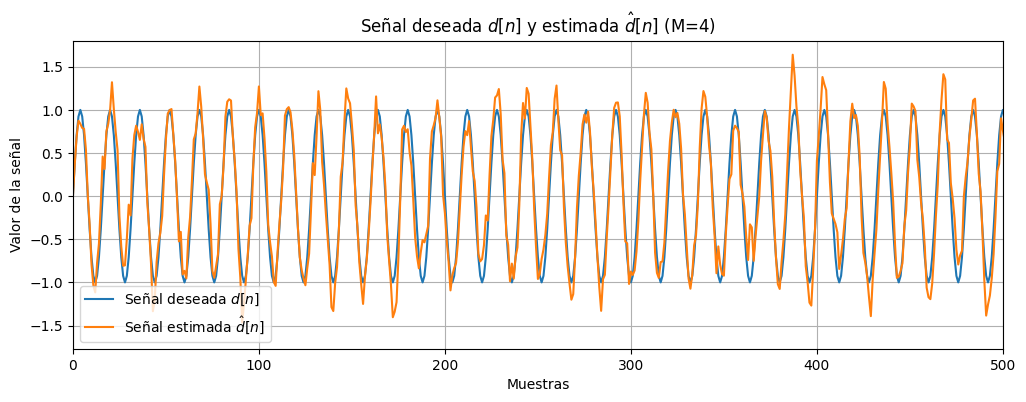

Error cuadrático medio para M=4: 0.04659687070691637

ANÁLISIS PARA M = 8


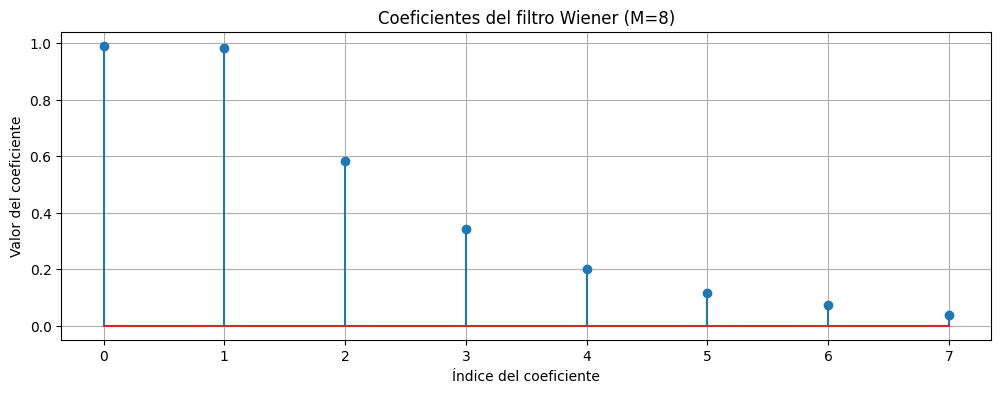

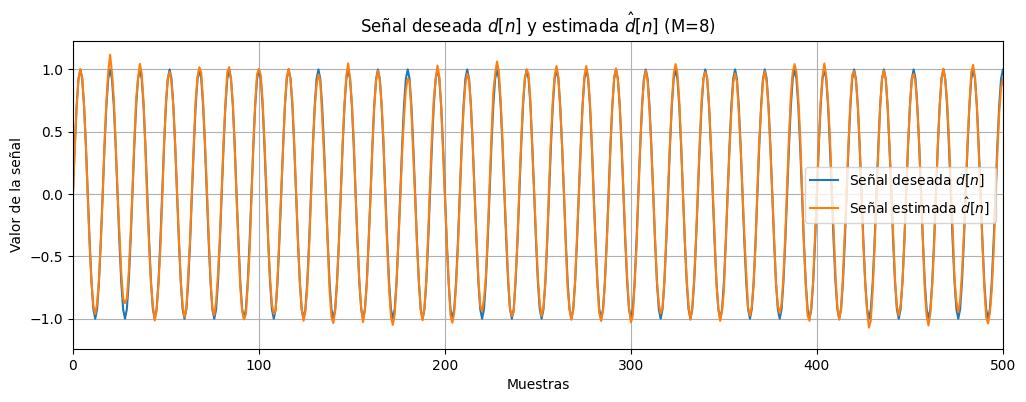

Error cuadrático medio para M=8: 0.0015328549772789719

ANÁLISIS PARA M = 16


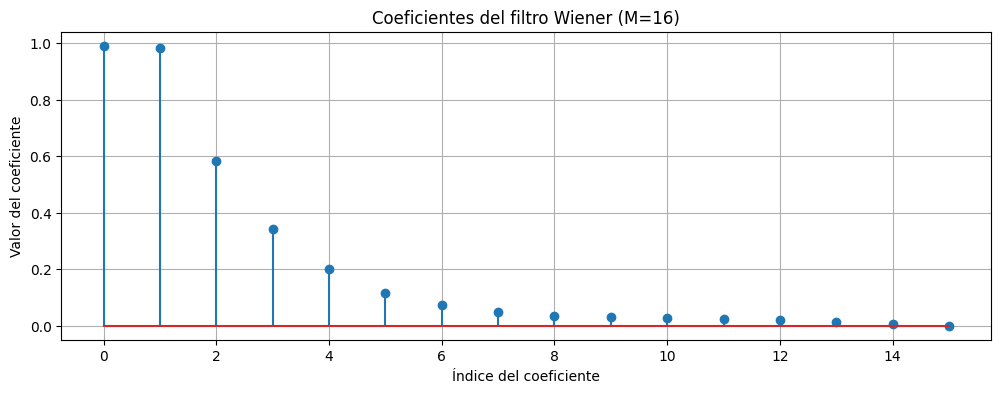

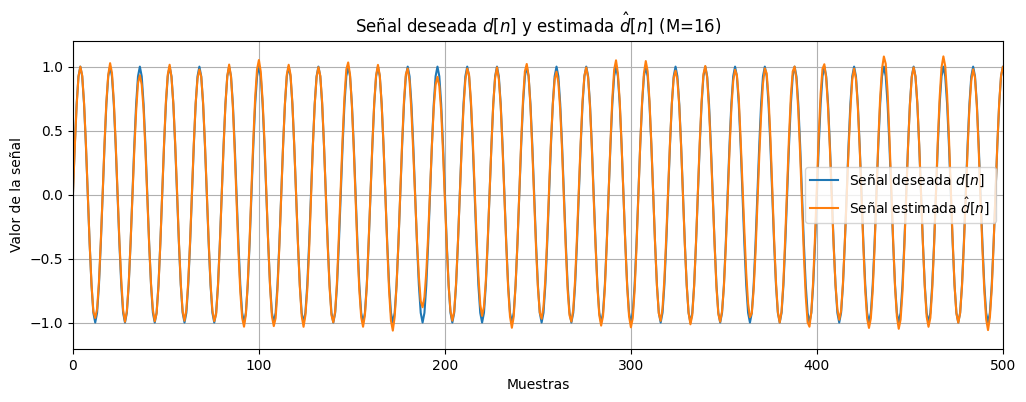

Error cuadrático medio para M=16: 0.001366970673308594

ANÁLISIS PARA M = 32


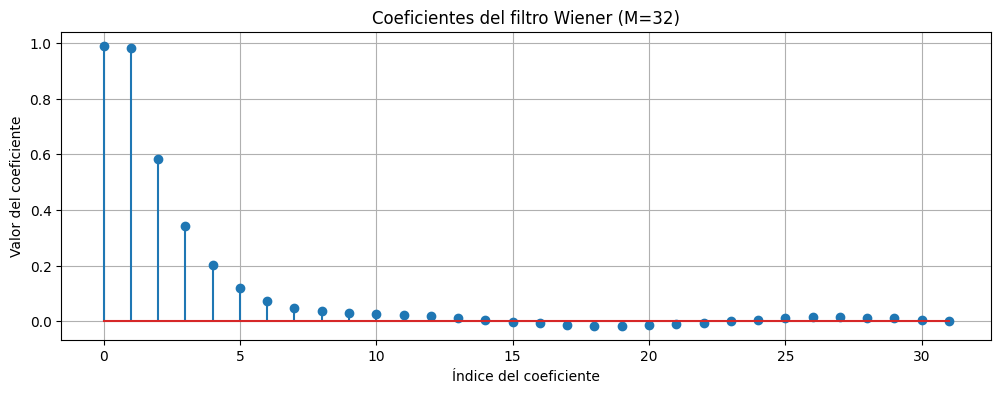

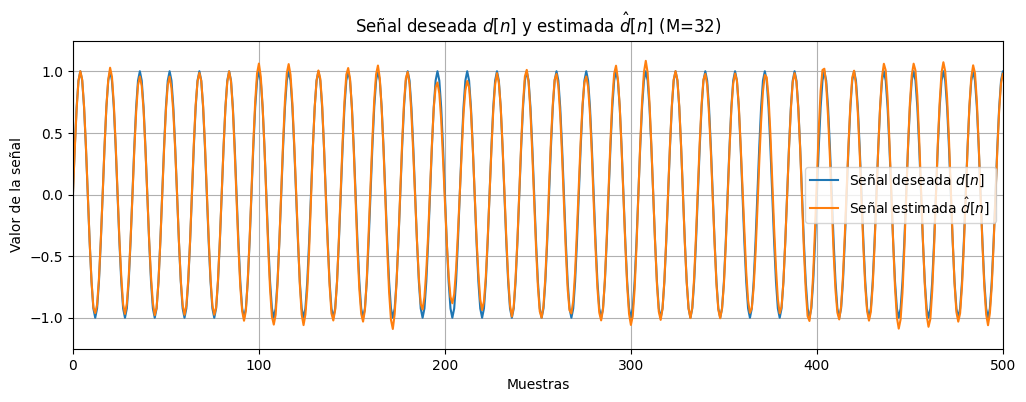

Error cuadrático medio para M=32: 0.00238223709394169

ANÁLISIS PARA M = 64


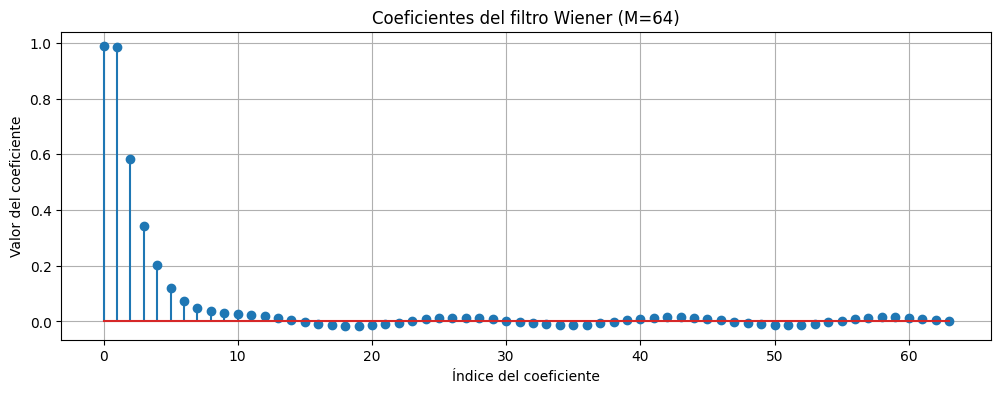

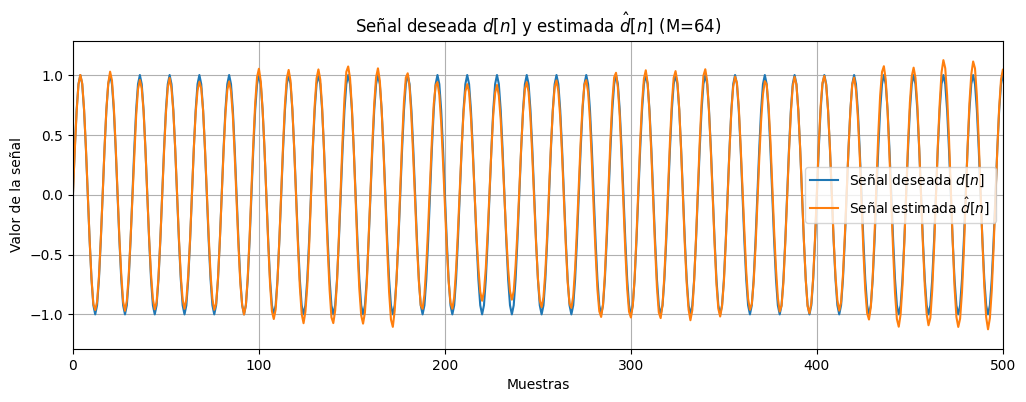

Error cuadrático medio para M=64: 0.004189233943967076

ANÁLISIS PARA M = 128


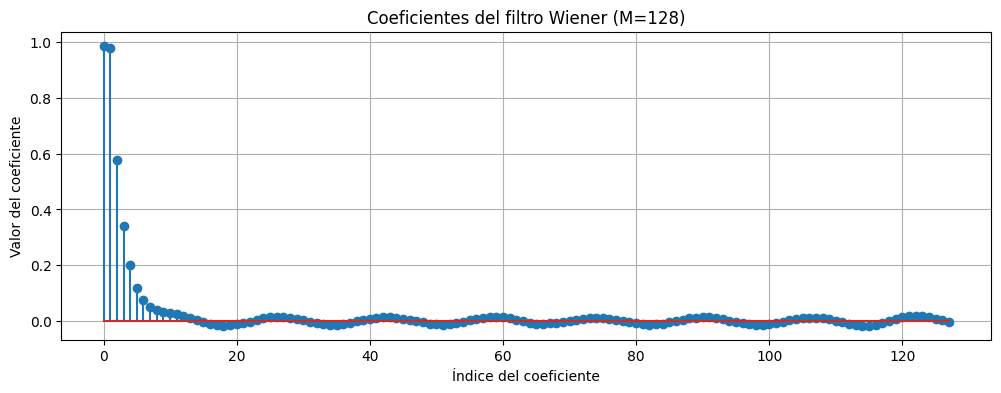

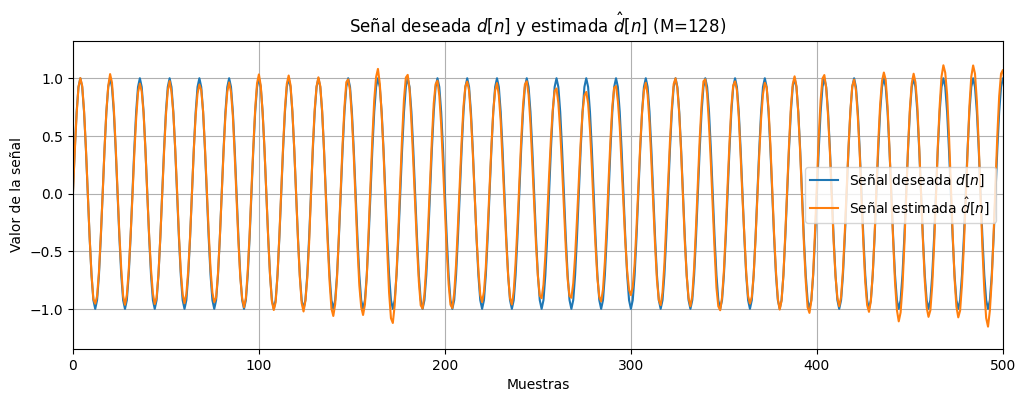

Error cuadrático medio para M=128: 0.007555567181372142


In [206]:
# Lista de valores de M a analizar
M_valores = [2, 4, 8, 16, 32, 64, 128]

# Lista para almacenar errores cuadráticos medios
errores_cuadraticos = []

# Diccionario para almacenar coeficientes de cada filtro
coeficientes_filtros = {}

# Iterar sobre todos los valores de M
for M in M_valores:
    print(f"\n{'='*70}")
    print(f"ANÁLISIS PARA M = {M}")
    print(f"{'='*70}")
    
    # Generamos la matriz de autocorrelaciones
    R_v2 = np.zeros((M, M))
    for i in range(M):
        for j in range(M):
            # Hallamos las autocorrelaciones, usamos la función np.mean para hallar
            # la esperanza. Entonces podemos calcular la autocorrelación como la formula
            R_v2[i, j] = np.mean(v2[np.abs(i - j):N] * v2[:N - np.abs(i - j)])
    
    # Obtenemos el vector de correlación cruzada r_x_v2
    r_x_v2 = np.zeros(M)
    for k in range(M):
        # Hallamos la correlación cruzada
        r_x_v2[k] = np.mean(x_n[k:N - 1] * v2[0:N - (k + 1)])
    
    # Cálculo de los coeficientes del filtro Wiener
    W = np.dot(np.linalg.inv(R_v2), r_x_v2)
    v1_estimado = signal.lfilter(W, [1], v2)
    
    # Hallamos el error o d[n] estimado
    error = x_n - v1_estimado
    d_estimado = error
    
    # Calculamos el error cuadrático medio
    error_cuadratico = np.mean((d_n[M:] - d_estimado[M:])**2)
    
    # Almacenar resultados
    errores_cuadraticos.append(error_cuadratico)
    coeficientes_filtros[M] = W
    
    # Visualización de los coeficientes del filtro Wiener
    plt.figure(figsize=[12, 4])
    plt.stem(W)
    plt.title(f"Coeficientes del filtro Wiener (M={M})")
    plt.xlabel('Índice del coeficiente')
    plt.ylabel('Valor del coeficiente')
    plt.grid('on')
    plt.show()
    
    # Visualización de la señal deseada y la estimada
    plt.figure(figsize=[12, 4])
    plt.plot(d_n, label='Señal deseada $d[n]$')
    plt.plot(d_estimado, label='Señal estimada $\hat{d}[n]$')
    plt.title(f'Señal deseada $d[n]$ y estimada $\hat{{d}}[n]$ (M={M})')
    plt.xlabel('Muestras')
    plt.ylabel('Valor de la señal')
    plt.xlim([0, 500])
    plt.legend()
    plt.grid('on')
    plt.show()
    
    # Impresión del error cuadrático medio
    print(f'Error cuadrático medio para M={M}: {error_cuadratico}')
    

In [207]:
import pandas as pd
# Tabla de resultados
tabla_resultados = pd.DataFrame({
    'M': M_valores,
    'Error Cuadrático Medio': errores_cuadraticos
})

print("\n" + "="*60)
print("TABLA DE RESULTADOS - ERROR CUADRÁTICO MEDIO")
print("="*60)
print(tabla_resultados.to_string(index=False))
print("="*60)

# Encontrar el M óptimo
M_optimo = M_valores[np.argmin(errores_cuadraticos)]
MSE_minimo = min(errores_cuadraticos)
print(f"\nMenor MSE: {MSE_minimo} con M = {M_optimo}")


TABLA DE RESULTADOS - ERROR CUADRÁTICO MEDIO
  M  Error Cuadrático Medio
  2                0.356027
  4                0.046597
  8                0.001533
 16                0.001367
 32                0.002382
 64                0.004189
128                0.007556

Menor MSE: 0.001366970673308594 con M = 16


Parte 2)

In [208]:
# Definimos el orden del filtro Wiener
M = 16

# Construimos la matriz de autocorrelación R_v2
R_v2 = np.zeros((M, M))
for i in range(M):
    for j in range(M):
        # Calculamos las autocorrelaciones utilizando la media
        R_v2[i, j] = np.mean(v2[np.abs(i - j):N] * v2[:N - np.abs(i - j)])

# Calculamos el vector de correlación cruzada entre x y v2
r_x_v2 = np.zeros(M)
for k in range(M):
    # Estimamos la correlación cruzada
    r_x_v2[k] = np.mean(x_n[k:N - 1] * v2[0:N - (k + 1)])

# Estimamos los coeficientes del filtro Wiener usando la inversa de R_v2
W = np.dot(np.linalg.inv(R_v2), r_x_v2)
v1_estimado = signal.lfilter(W, [1], v2)

# Calculamos el error estimado d[n]
err = x_n - v1_estimado
d_estimado = err

# Calculamos el error cuadrático medio
error_cuadratico_medio = np.mean((d_n[M:] - d_estimado[M:]) ** 2)
print(f'Error cuadrático medio Wiener: {error_cuadratico_medio}')
print('='*70)


Error cuadrático medio Wiener: 0.001366970673308594


In [209]:
#Algoritmo LMS para cada  valor de μ

#valores de μ 
mu_values = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008]

#almaceno resultados
errores_cuadraticos = []
h_LMS_dict = {}
vn2_LMS_dict = {}
err_LMS_dict = {}

for mu in mu_values:
    #filtro LMS
    h_LMS = np.zeros((M, N))
    #v2[n] ingresa al filtro
    vn2_LMS = np.zeros(N)
    
    xx = np.zeros(M)
    for n in range(N-1):
        xx = np. roll(xx, 1)
        xx[0] = v2[n]
        vn2_LMS[n] = np.dot(h_LMS[:, n], xx)
        en = x_n[n] - vn2_LMS[n]
        h_LMS[:, n+1] = h_LMS[:, n] + 2*mu*en*xx
    
    #error o d[n] estimado
    err_LMS = x_n - vn2_LMS
    
    #error cuadrático medio
    error_cuadratico_LMS = np.mean((d_n[N//2:] - err_LMS[N//2:]) ** 2)
    
    print(f'Error cuadrático medio para μ={mu:.3f}: {error_cuadratico_LMS}')
    errores_cuadraticos.append(error_cuadratico_LMS)
    
    #guardar resultados
    h_LMS_dict[mu] = h_LMS
    vn2_LMS_dict[mu] = vn2_LMS
    err_LMS_dict[mu] = err_LMS

print('='*70)


Error cuadrático medio para μ=0.001: 0.006557443627710286
Error cuadrático medio para μ=0.002: 0.007550748843074481
Error cuadrático medio para μ=0.003: 0.012200845168717726
Error cuadrático medio para μ=0.004: 0.018213777075959524
Error cuadrático medio para μ=0.005: 0.025385653424552988
Error cuadrático medio para μ=0.006: 0.03370033592746373
Error cuadrático medio para μ=0.007: 0.04322579125373532
Error cuadrático medio para μ=0.008: 0.054072015646339414


In [210]:
#tabla de resultados

df_resultados = pd.DataFrame({
    'μ': mu_values,
    'MSE': errores_cuadraticos
})

print("\nTabla de Resultados - Algoritmo LMS:")
print(df_resultados.to_string(index=False))

mejor_idx = df_resultados['MSE'].idxmin()
print(f"\nMejor μ: {df_resultados.loc[mejor_idx, 'μ']}")
print(f"MSE mínimo: {df_resultados.loc[mejor_idx, 'MSE']}")


Tabla de Resultados - Algoritmo LMS:
    μ      MSE
0.001 0.006557
0.002 0.007551
0.003 0.012201
0.004 0.018214
0.005 0.025386
0.006 0.033700
0.007 0.043226
0.008 0.054072

Mejor μ: 0.001
MSE mínimo: 0.006557443627710286


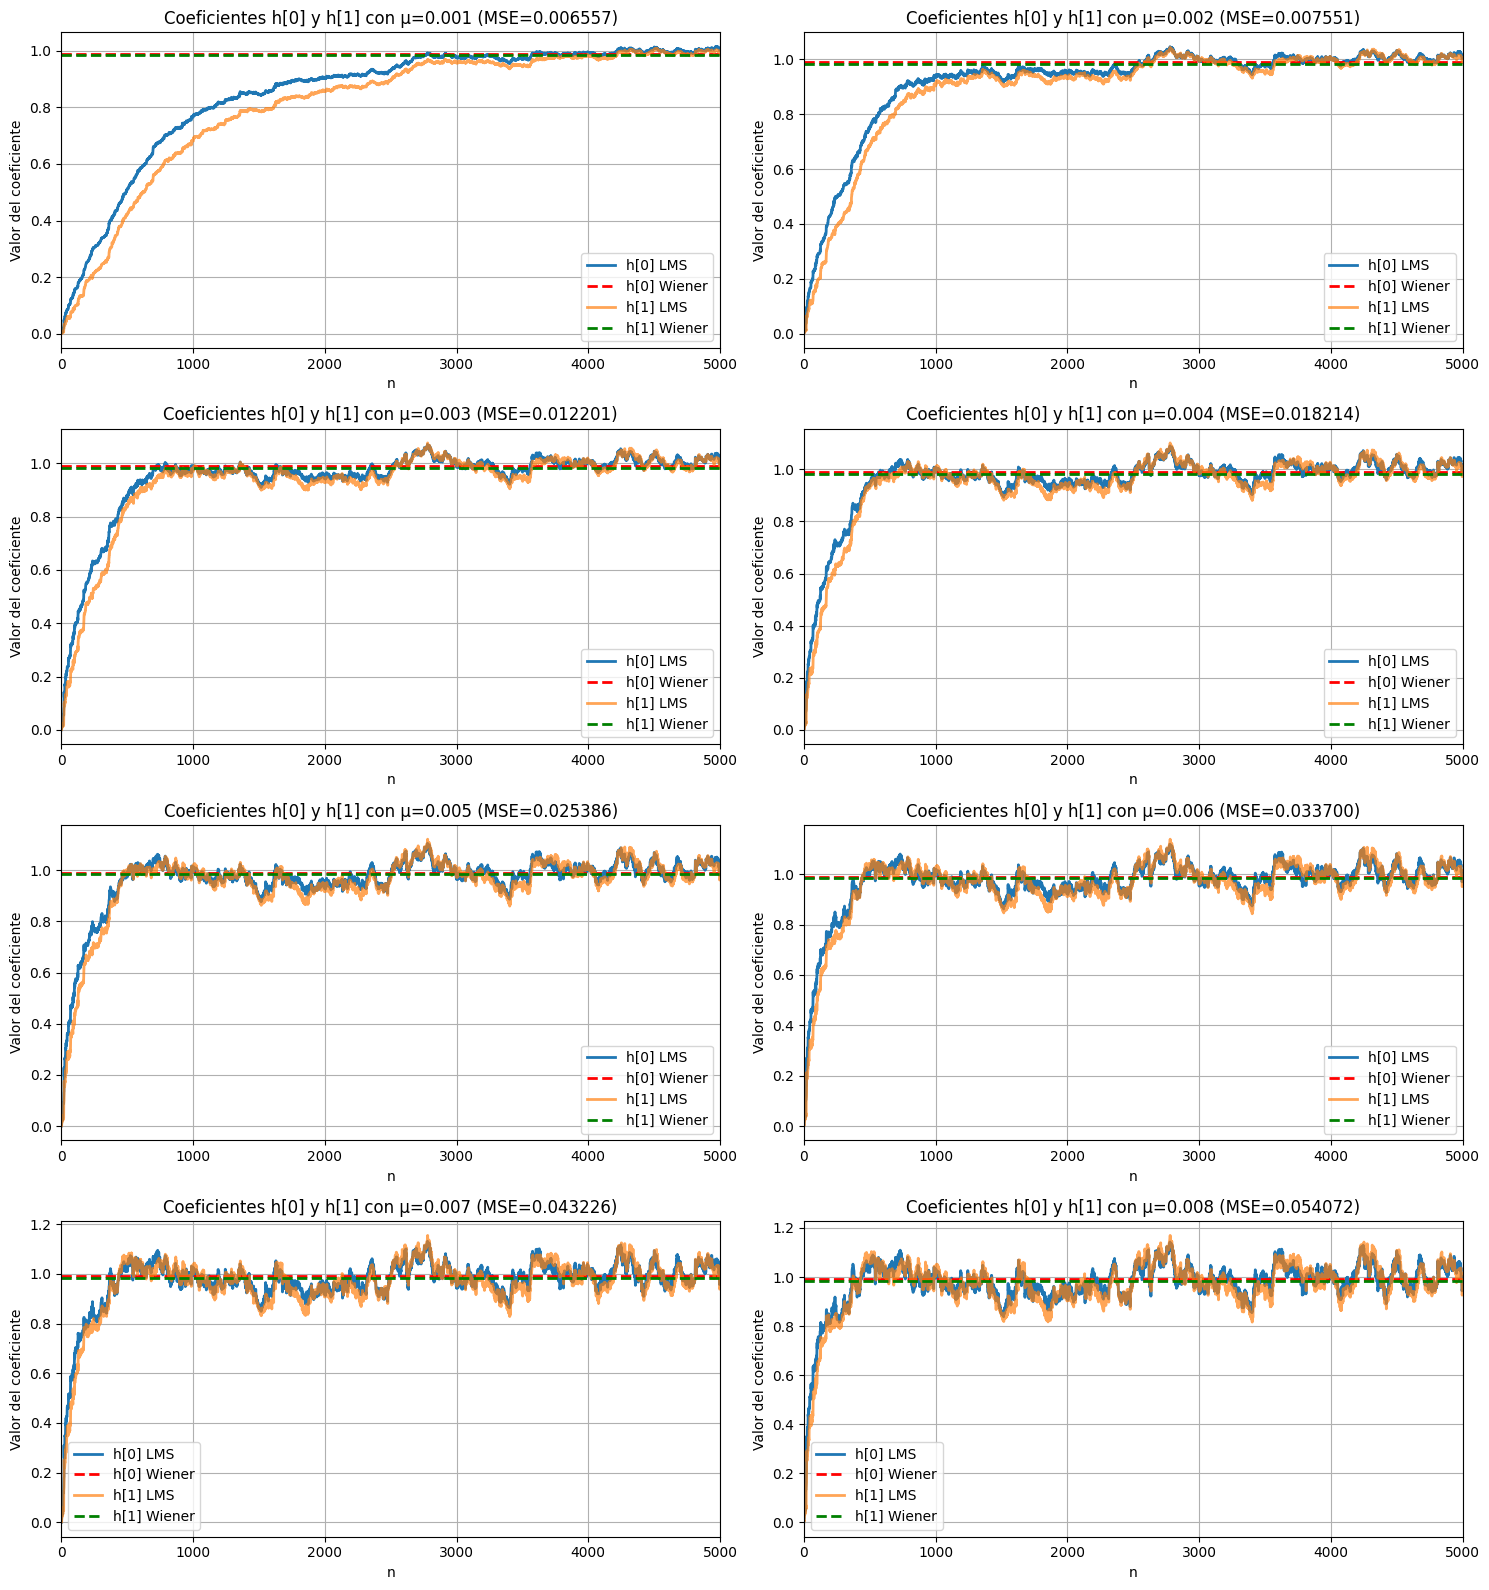

In [211]:
#grafica evolucion de coeficeintes h[0] y h[1] para todos los μ

fig, axes = plt.subplots(4, 2, figsize=(15, 16))
axes = axes.flatten()

for idx, mu in enumerate(mu_values):
    h_LMS = h_LMS_dict[mu]
    
    #subplot para cada μ
    ax = axes[idx]
    
    #grafica h[0]
    ax.plot(h_LMS[0, :], label='h[0] LMS', linewidth=2)
    ax.plot([0, N], [W[0], W[0]], 'r--', linewidth=2, label='h[0] Wiener')
    
    #grafica h[1]
    ax.plot(h_LMS[1, :], label='h[1] LMS', linewidth=2, alpha=0.7)
    ax.plot([0, N], [W[1], W[1]], 'g--', linewidth=2, label='h[1] Wiener')
    
    ax.set_title(f'Coeficientes h[0] y h[1] con μ={mu:.3f} (MSE={errores_cuadraticos[idx]:.6f})')
    ax.set_xlabel('n')
    ax.set_ylabel('Valor del coeficiente')
    ax.grid(True)
    ax.legend(loc='best')
    ax.set_xlim([0, 5000])  

plt. tight_layout()
plt.show()

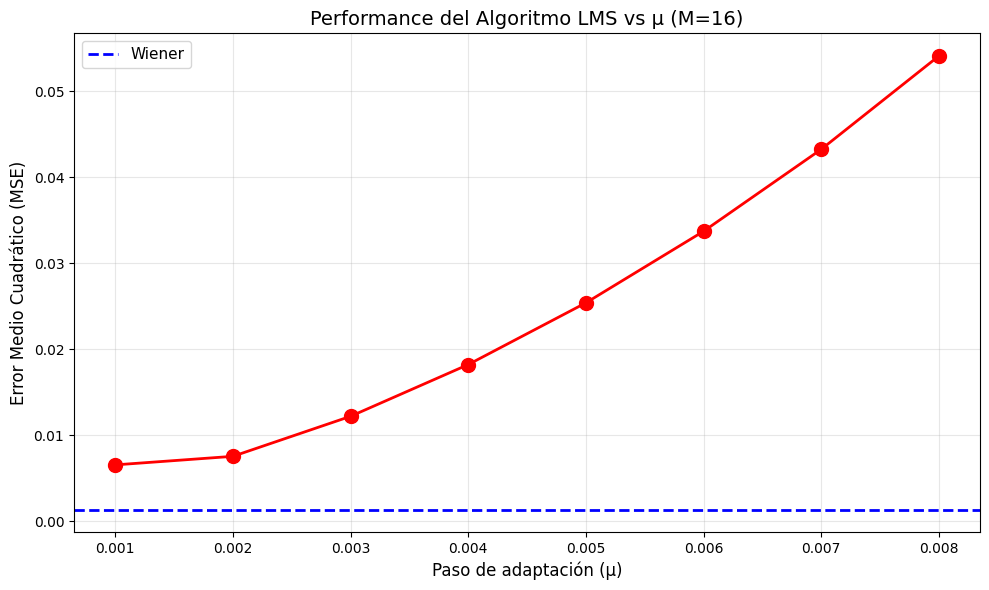

In [212]:
#grafica MSE vs μ
plt.figure(figsize=(10, 6))
plt.plot(mu_values, errores_cuadraticos, 'o-', linewidth=2, markersize=10, color='red')
plt.axhline(y=error_cuadratico_medio, color='blue', linestyle='--', 
            linewidth=2, label='Wiener')
plt.xlabel('Paso de adaptación (μ)', fontsize=12)
plt.ylabel('Error Medio Cuadrático (MSE)', fontsize=12)
plt.title('Performance del Algoritmo LMS vs μ (M=16)', fontsize=14)
plt.grid(True, alpha=0.3)
plt. legend(fontsize=11)
plt.tight_layout()
plt.show()

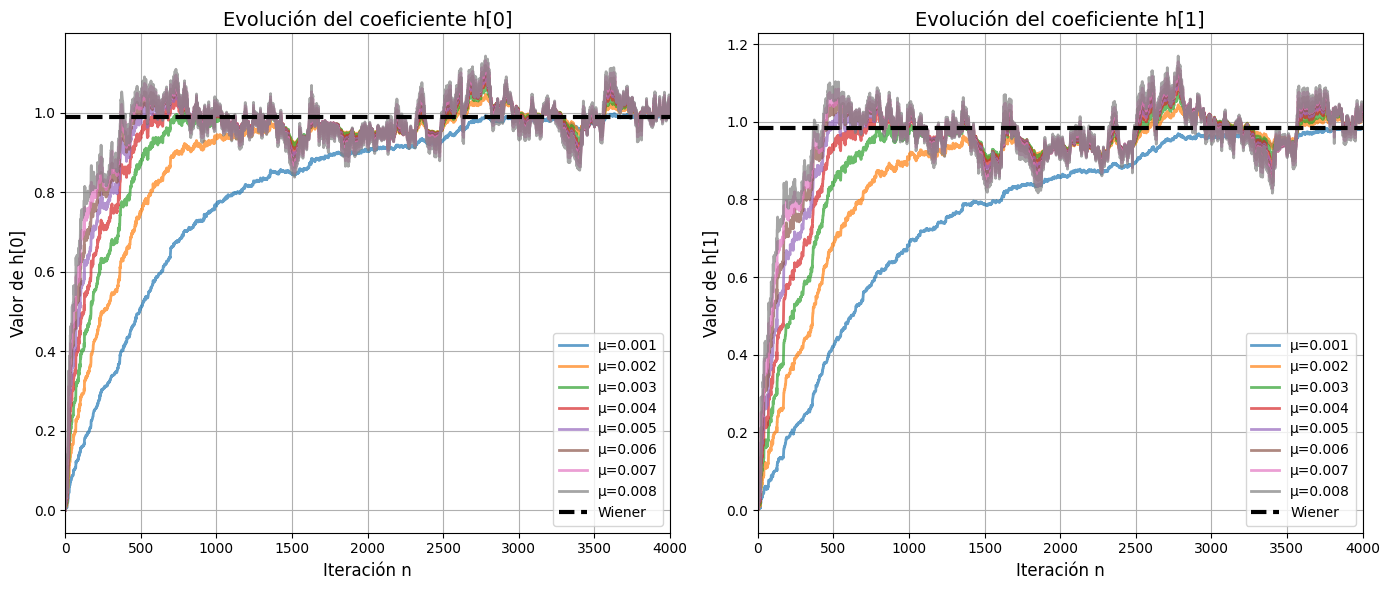

In [213]:
#grafica de h[0] para todos los μ
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for mu in mu_values:
    h_LMS = h_LMS_dict[mu]
    plt.plot(h_LMS[0, :], label=f'μ={mu:.3f}', linewidth=2, alpha=0.7)
plt.plot([0, N], [W[0], W[0]], 'k--', linewidth=3, label='Wiener')
plt.xlabel('Iteración n', fontsize=12)
plt.ylabel('Valor de h[0]', fontsize=12)
plt.title('Evolución del coeficiente h[0]', fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim([0, 4000])

#grafica de h[1] para todos los μ
plt.subplot(1, 2, 2)
for mu in mu_values:
    h_LMS = h_LMS_dict[mu]
    plt.plot(h_LMS[1, :], label=f'μ={mu:.3f}', linewidth=2, alpha=0.7)
plt.plot([0, N], [W[1], W[1]], 'k--', linewidth=3, label='Wiener')
plt.xlabel('Iteración n', fontsize=12)
plt.ylabel('Valor de h[1]', fontsize=12)
plt. title('Evolución del coeficiente h[1]', fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim([0, 4000])

plt.tight_layout()
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:18: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-2475378703.py:18: SyntaxWarning: invalid escape sequence '\h'
  ax.set_title(f'$\hat{{v_1}}[n]$ con μ={mu:.3f}')


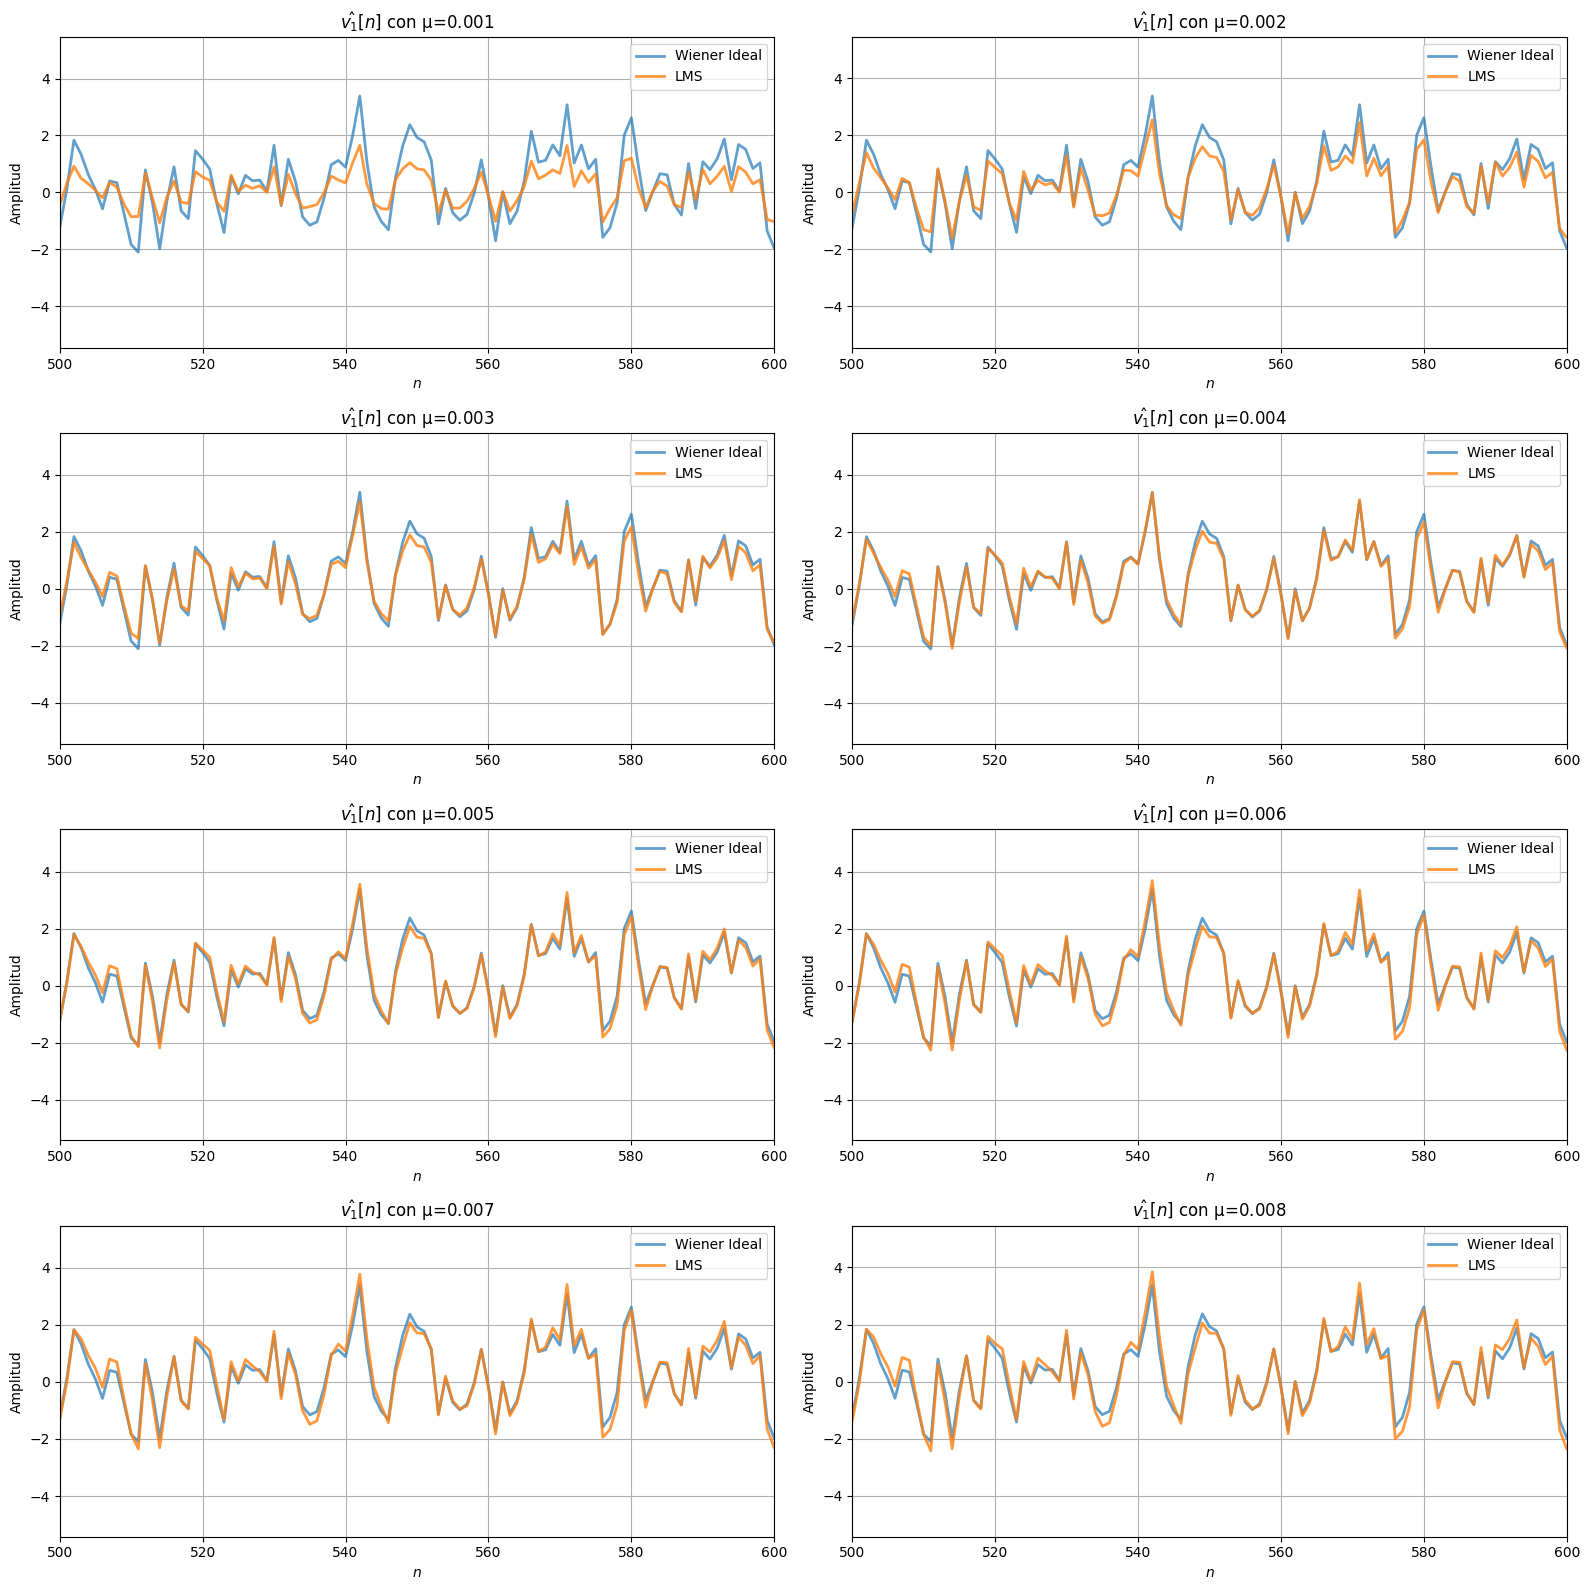

In [223]:
#graficas comparacion v1[n] Y d[n] para cada μ

fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.flatten()

for idx, mu in enumerate(mu_values):
    vn2_LMS = vn2_LMS_dict[mu]
    err_LMS = err_LMS_dict[mu]
    
    ax = axes[idx]
    
    #señal v1 estimada
    ax.plot(v1_estimado, label='Wiener Ideal', linewidth=2, alpha=0.7)
    ax.plot(vn2_LMS, label='LMS', linewidth=2, alpha=0.8)
    ax.set_xlim([500, 600])
    ax.set_xlabel('$n$')
    ax.set_ylabel('Amplitud')
    ax.set_title(f'$\hat{{v_1}}[n]$ con μ={mu:.3f}')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\h'
<>:17: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-2952004965.py:17: SyntaxWarning: invalid escape sequence '\h'
  ax.set_title(f'$\hat{{d}}[n]$ con μ={mu:.3f} (MSE={errores_cuadraticos[idx]:.6f})')


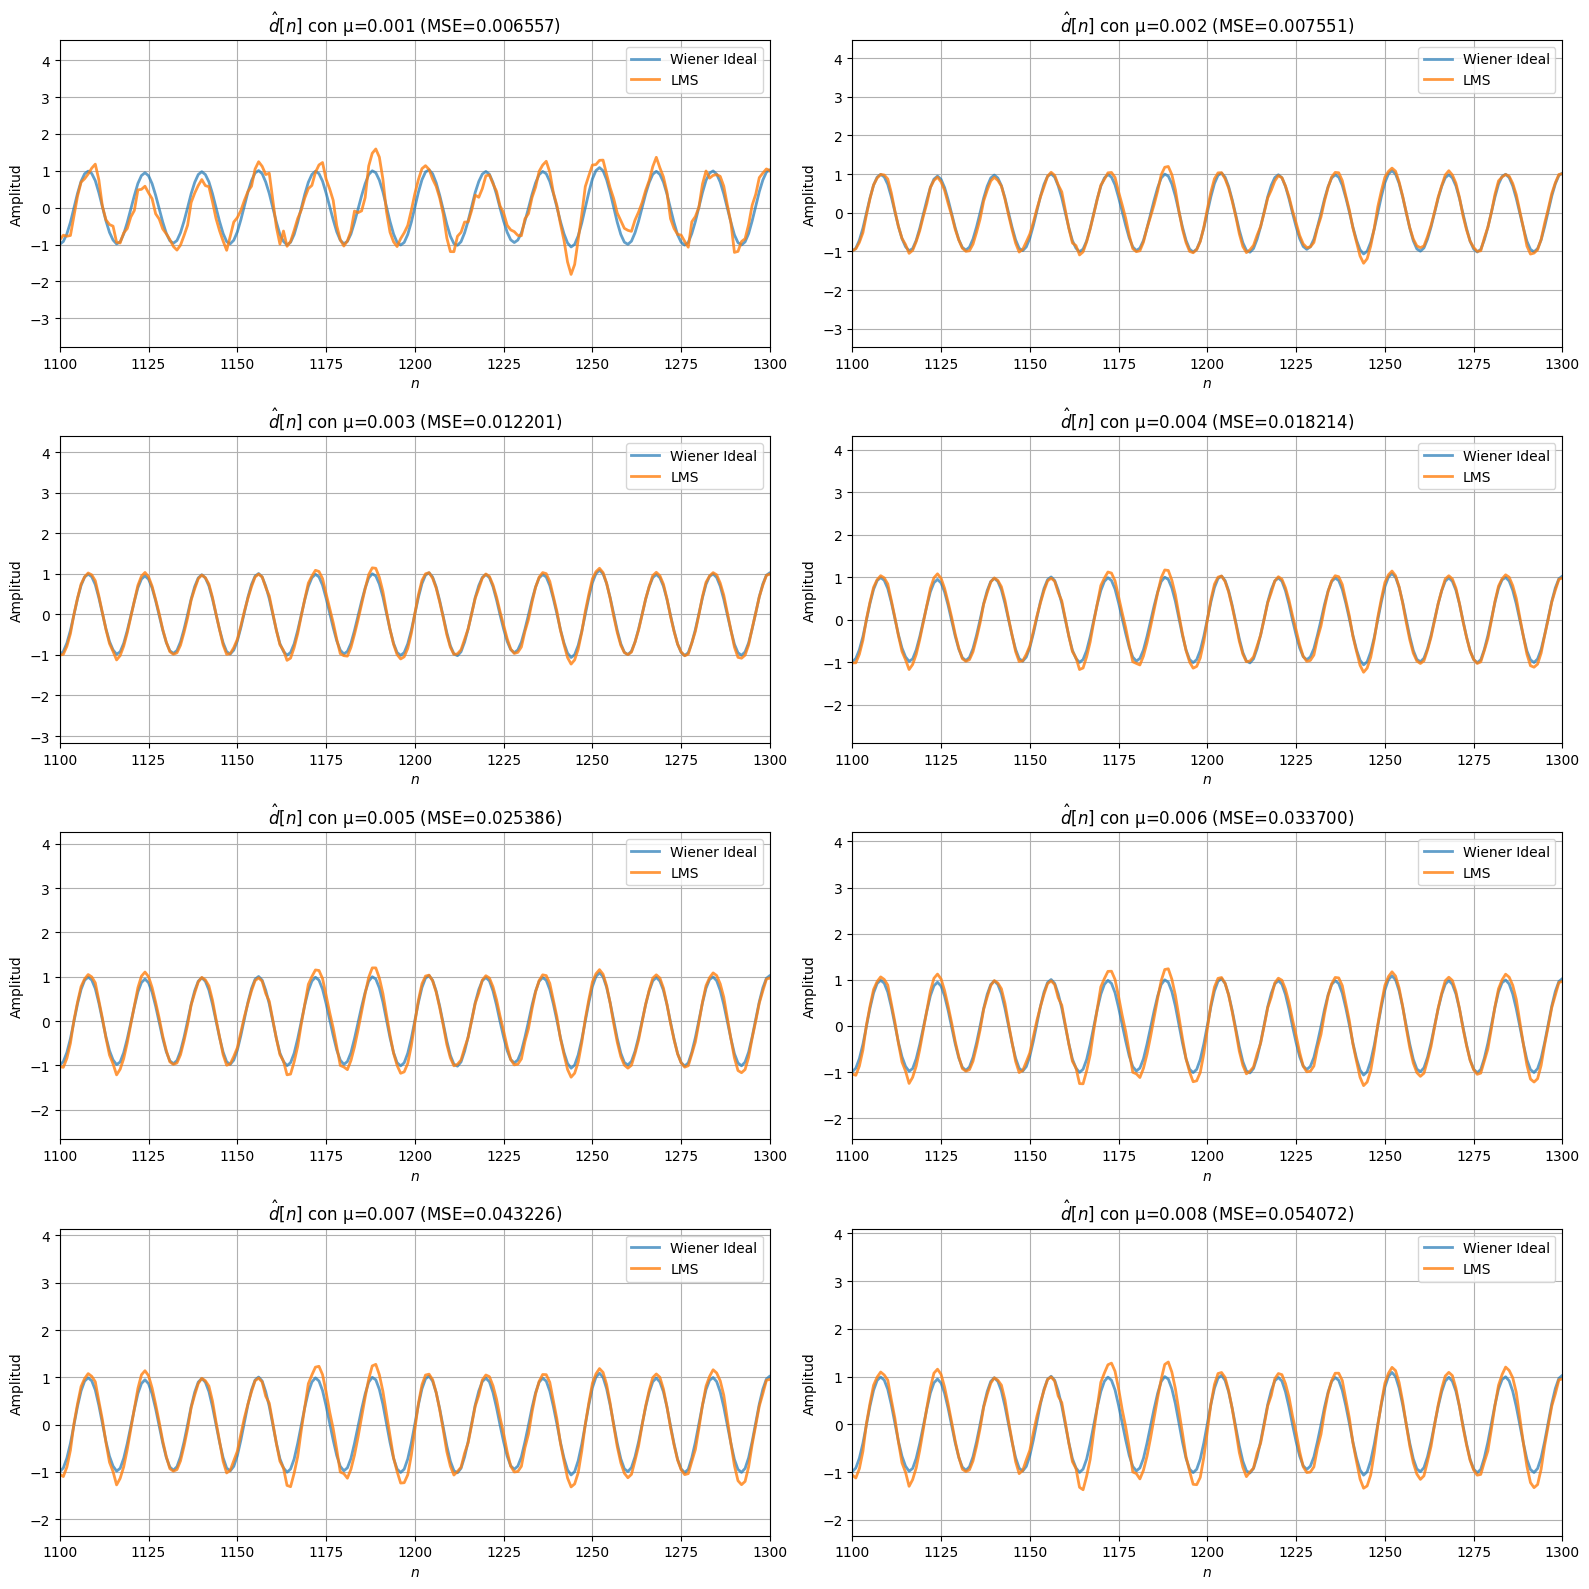

In [221]:
#graficas comparacion d[n] estimado para cada μ

fig, axes = plt. subplots(4, 2, figsize=(16, 16))
axes = axes.flatten()

for idx, mu in enumerate(mu_values):
    err_LMS = err_LMS_dict[mu]
    
    ax = axes[idx]
    
    #señal deseada d[n]
    ax.plot(err, label='Wiener Ideal', linewidth=2, alpha=0.7)
    ax. plot(err_LMS, label='LMS', linewidth=2, alpha=0.8)
    ax.set_xlim([1100, 1300])
    ax.set_xlabel('$n$')
    ax.set_ylabel('Amplitud')
    ax.set_title(f'$\hat{{d}}[n]$ con μ={mu:.3f} (MSE={errores_cuadraticos[idx]:.6f})')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


# 3. Prediccion lineal en el mercado de valores

PARTE 1)

PARTE 2)

PARTE 3)

PARTE 4)

PARTE 5)

PARTE 6)